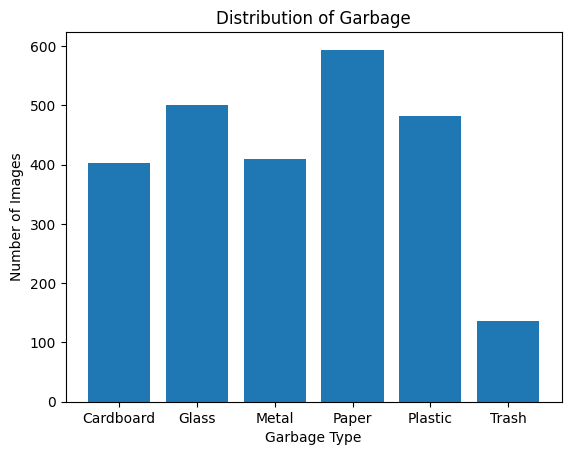

In [6]:
import matplotlib.pyplot as plt
import os

# Count the number of images in each class
num_cardboard = len(os.listdir('dataset-resized/cardboard'))
num_glass = len(os.listdir('dataset-resized/glass'))
num_metal = len(os.listdir('dataset-resized/metal'))
num_paper = len(os.listdir('dataset-resized/paper'))
num_plastic = len(os.listdir('dataset-resized/plastic'))
num_trash = len(os.listdir('dataset-resized/trash'))

# Create a list of counts
counts = [num_cardboard, num_glass, num_metal, num_paper, num_plastic, num_trash]

# Create a list of labels
labels = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

# Create a bar plot
plt.bar(labels, counts)

# Add a title and labels
plt.title('Distribution of Garbage')
plt.xlabel('Garbage Type')
plt.ylabel('Number of Images')

# Display the plot
plt.show()


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_ds = train_datagen.flow_from_directory('C:/Users/SID/Desktop/Labs/DSBDA mini project/dataset-resized', target_size=(224,224), batch_size=32, class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_ds = val_datagen.flow_from_directory('C:/Users/SID/Desktop/Labs/DSBDA mini project/dataset-resized', target_size=(224,224), batch_size=32, class_mode='categorical')


# pretrained_model = load_model('my_model.h5')
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)



Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Epoch 1/10
79/79 [==============================] - 74s 934ms/step - loss: 1.6692 - accuracy: 0.3435 - val_loss: 1.3764 - val_accuracy: 0.4377
Epoch 2/10
79/79 [==============================] - 86s 1s/step - loss: 1.2940 - accuracy: 0.4875 - val_loss: 1.2056 - val_accuracy: 0.5002
Epoch 3/10
79/79 [==============================] - 86s 1s/step - loss: 1.1317 - accuracy: 0.5611 - val_loss: 0.9950 - val_accuracy: 0.6260
Epoch 4/10
79/79 [==============================] - 85s 1s/step - loss: 1.0430 - accuracy: 0.5999 - val_loss: 0.8712 - val_accuracy: 0.6668
Epoch 5/10
79/79 [==============================] - 87s 1s/step - loss: 0.9671 - accuracy: 0.6518 - val_loss: 0.8394 - val_accuracy: 0.7083
Epoch 6/10
79/79 [==============================] - 85s 1s/step - loss: 0.8562 - accuracy: 0.6882 - val_loss: 0.7690 - val_accuracy: 0.7313
Epoch 7/10
79/79 [==============================] - 85s 1s/step - loss: 0

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [3]:
# model.save('garbage_classification_model.h5')

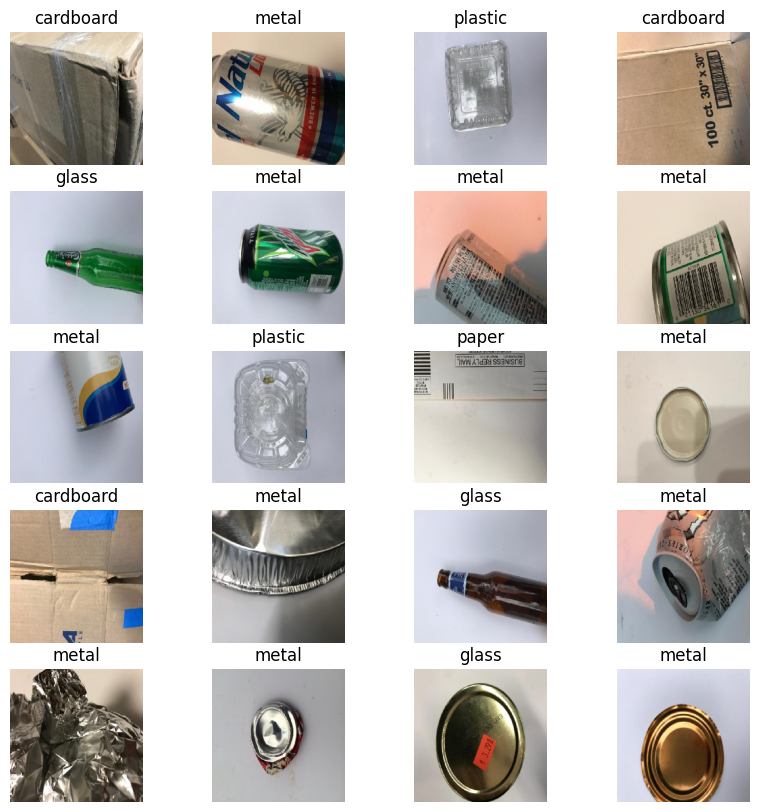

In [6]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the validation dataset
images, labels = next(val_ds)

# Plot the images with their corresponding labels
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(list(train_ds.class_indices.keys())[list(train_ds.class_indices.values()).index(labels[i].argmax())])
    ax.axis('off')
plt.show()


In [12]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Create a root window
root = tk.Tk()
root.withdraw()

# Open a file dialog to select an image file
file_path = filedialog.askopenfilename()

# Load the model
model = load_model('garbage_classification_model.h5')

# Load the image and preprocess it
img = image.load_img(file_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Get the predicted class probabilities
preds = model.predict(img_array)
class_idx = np.argmax(preds[0])
class_label = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'][class_idx]
print(f"The predicted class is: {class_label}")


1/1 [==============================] - 0s 110ms/step
The predicted class is: glass
